# Adding Regression Lines to Pandas Plots with SciPy

## Regression can be used to predict the future or to identify trends and relationships in data

In [42]:
import pandas as pd
from scipy import stats

In [68]:
G7data = gdpdata[(gdpdata['MEASURE']=='VIXOBSA') 
        & (gdpdata['Country']=='G7')]
        
G7data=G7data[['Period','Value']]
G7data.to_csv('g7datamore.csv')


In [67]:
G7data = pd.read_csv('g7datamore.csv')


C:\Users\jones\AppData\Local\Temp\ipykernel_6992\3270447049.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  pd.concat(pd.Series(G7data['Period']),(['Q1-2022','Q2-2022','Q3-2022','Q4-2022']))


TypeError: first argument must be an iterable of pandas objects, you passed an object of type "Series"

In [48]:
def formyr(x,data):
    d = data['Period'].values[x]
    y= int(d[-4:])+int(d[1:2])*0.25 - 2007
    return y   

yr=[formyr(x,G7data) for x in range(len(G7data)) ]
G7data['yr'] = yr
G7data


,Period,Value,yr
1260,Q1-2007,92.4,0.25
1261,Q2-2007,92.9,0.50
1262,Q3-2007,93.2,0.75
1263,Q4-2007,93.6,1.00
1264,Q1-2008,93.7,1.25
1265,Q2-2008,93.8,1.50
1266,Q3-2008,93.1,1.75
1267,Q4-2008,91.2,2.00
1268,Q1-2009,89.1,2.25
1269,Q2-2009,89.2,2.50


<AxesSubplot:xlabel='Period', ylabel='Value'>

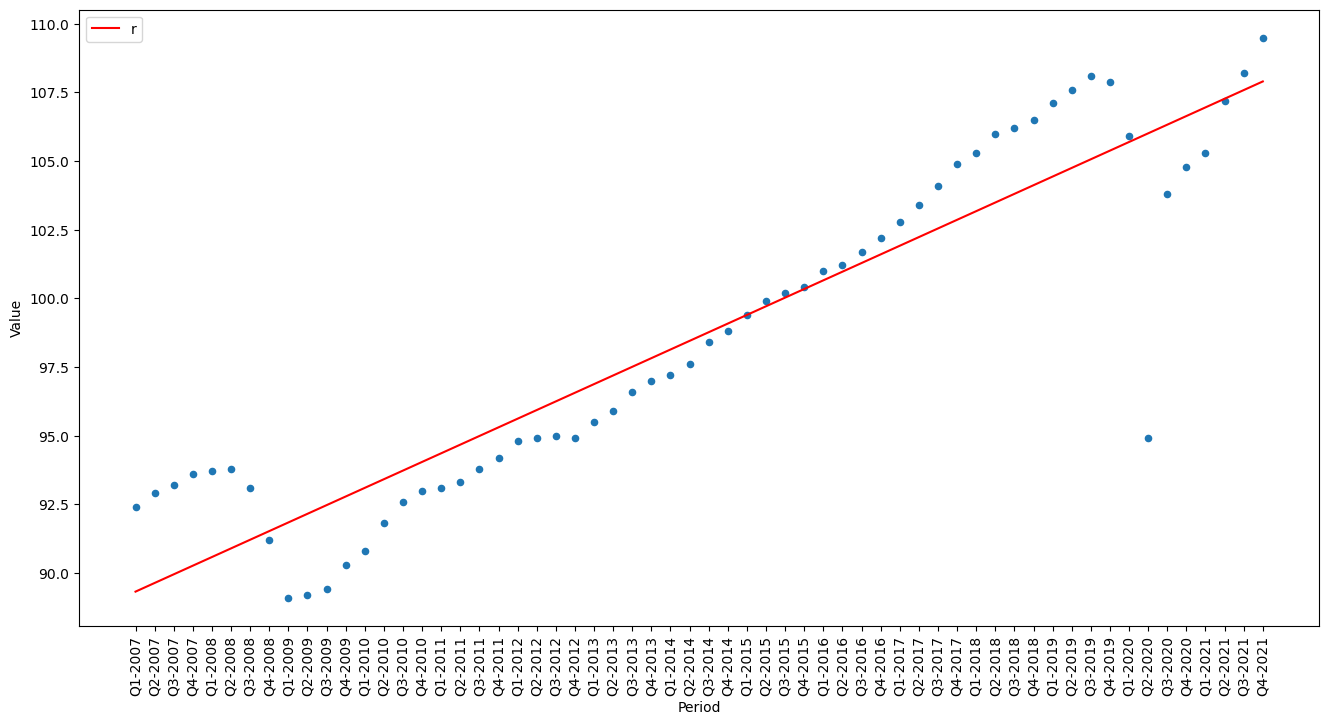

In [49]:
x = G7data['yr']
y = G7data['Value']

m = stats.linregress(x, y)

t = [m.slope * i + m.intercept for i in x]
G7data.insert(len(G7data.columns),'r',t)

ax = G7data.plot.scatter(x='Period',
                         y='Value')
G7data.plot.line(x='Period',
                 y='r', 
                 color='red', 
                 ax=ax, 
                 figsize = (16,8), 
                 rot=90)

#G7data


,Period,Value,yr,r,r2
1260,Q1-2007,92.4,0.25,89.317705,86.177087
1261,Q2-2007,92.9,0.50,89.632698,86.580826
1262,Q3-2007,93.2,0.75,89.947691,86.984565
1263,Q4-2007,93.6,1.00,90.262684,87.388304
1264,Q1-2008,93.7,1.25,90.577677,87.792043
1265,Q2-2008,93.8,1.50,90.892670,88.195783
1266,Q3-2008,93.1,1.75,91.207663,88.599522
1267,Q4-2008,91.2,2.00,91.522656,89.003261
1268,Q1-2009,89.1,2.25,91.837649,89.407000
1269,Q2-2009,89.2,2.50,92.152642,89.810739


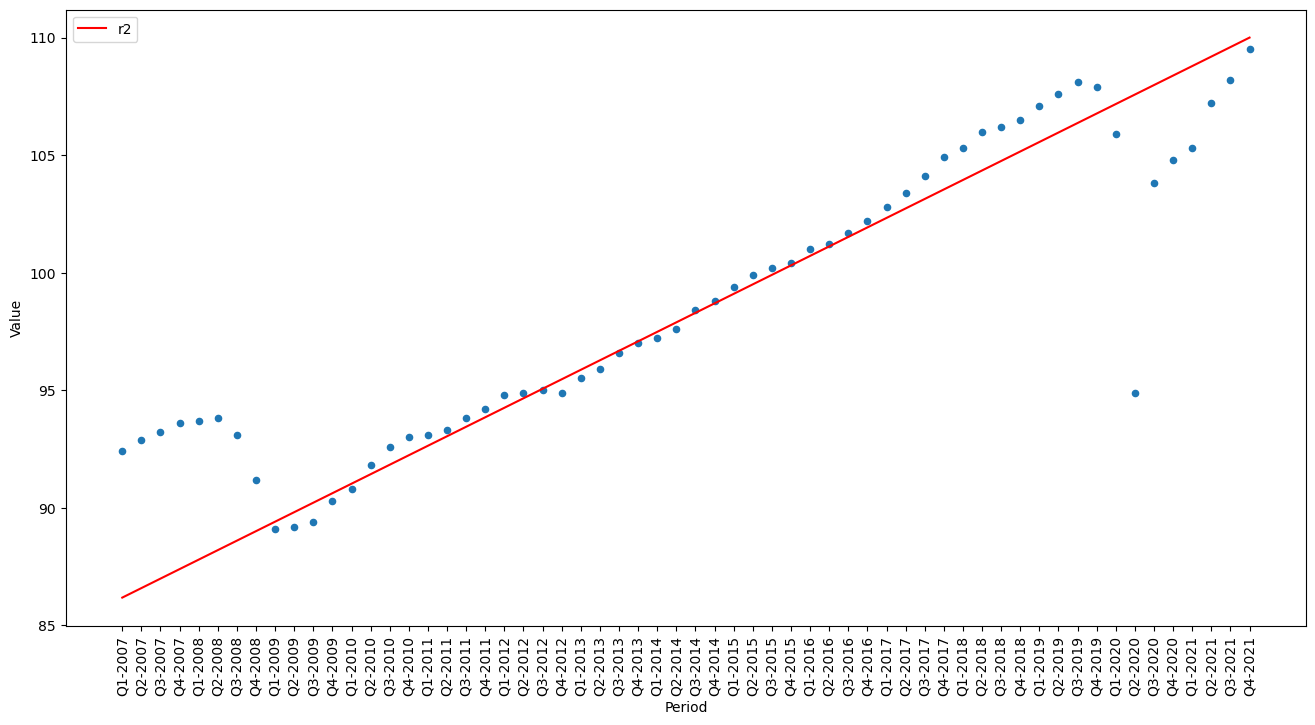

In [50]:
G7data2009 = G7data[(G7data['yr']>2) & (G7data['yr']<=8)]


x = G7data2009['yr']
y = G7data2009['Value']

m = stats.linregress(x, y)

t = [m.slope * i + m.intercept for i in G7data['yr']]

G7data.insert(len(G7data.columns),'r2',t)

ax = G7data.plot.scatter(x='Period',
                         y='Value')
ax = G7data.plot.line(x='Period',
                      y='r2', 
                      color='red', 
                      ax=ax, 
                      figsize = (16,8), 
                      rot=90)

# trained on intervening years, the model does a pretty good job of predicting up
# Q1 2021 
# 2 things - the model is useful for predicting under normal circumstances
# - but random events happen in real life that cannot be predictded

G7data
